In [ ]:
%load_ext autoreload
%autoreload 2


import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import sys

# KEYS_TO_ADD = ["correctness", "predictions"]
# SUB_TO_SKIP = ["harness_gsm8k_5"]

sys.path.append("../")
from utils_for_notebooks import (
    MAX_NUM_ANSWERS,
    KEYS_TO_ADD,
    SUB_TO_SKIP,
    parse_df_with_results
)
sys.path.pop(0)

# MAX_NUM_ANSWERS = 31 # 5 for arc_harness_25, 31 for truth_harness_mc

In [2]:
# with open('data/leaderboard_raw_20240118.pickle', 'rb') as handle:
with open('../../data/leaderboard_raw_25042025.pickle', 'rb') as handle:
    df = pickle.load(handle)
# 14s

In [6]:
models = list(df.keys())
print(len(models))
# 452

# prune models that have no data
for key1 in df.keys():
    for key2 in df[key1].keys():
        if df[key1][key2]==None:
            try: models.remove(key1)
            except: pass
models.remove('open-llm-leaderboard/details_mindy-labs__mindy-7b') #for some scenarios, this model has a limited number of responses
print(len(models))
# 393

dates = np.array([datetime.strptime(df[model]['harness_gsm8k_5']['dates'][0][:10], '%Y_%m_%d') for model in models])
# dates = np.array([datetime.strptime(df[model]['harness_hendrycksTest_abstract_algebra_5']['dates'][0][:10], '%Y_%m_%d') for model in models])
order = np.argsort(dates)[::-1]
# print(dates[order][:int(order.shape[0]/4)])
print(dates[order][:].shape) # (393,)

data, max_answers_dict = parse_df_with_results(
    df,
    models,
    order,
    sub_to_skip=SUB_TO_SKIP,
    max_num_answers=MAX_NUM_ANSWERS,
    keys_to_add=KEYS_TO_ADD
)

# print(max(max_answers_dict.values()))

# for sub in df[list(df.keys())[0]].keys():
cnt = 0
for sub in data['data'].keys():
    for key in KEYS_TO_ADD:
        # print(sub, key)
        # print(order)
        # print(type(data['data'][sub][key]))
        # print(len(data['data'][sub][key]))
        # print(len(data['data'][sub][key][0]))
        # print(data['data'][sub][key].shape)
        data['data'][sub][key] = data['data'][sub][key][:,order]
        if cnt < 10:
            print(data['data'][sub][key].shape)
        cnt+= 1

    # data['data'][sub]['correctness'] = data['data'][sub]['correctness'][:,order]

452
393
(393,)


100%|██████████| 62/62 [00:16<00:00,  3.84it/s]


(1172, 393)
(1172, 393, 31)
(10042, 393)
(10042, 393, 31)
(817, 393)
(817, 393, 31)
(1267, 393)
(1267, 393, 31)
(100, 393)
(100, 393, 31)


In [5]:
with open('../../data/lb.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
dates[order][:].shape

(393,)

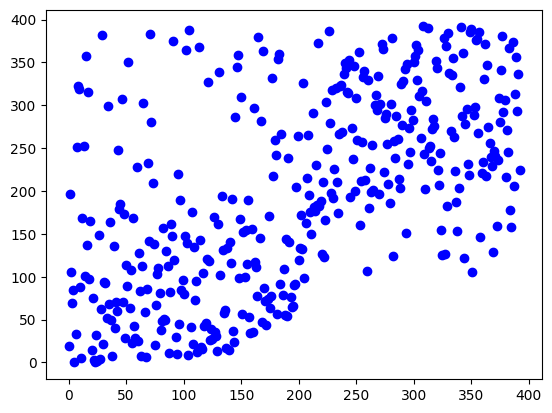

In [8]:
plt.plot(order,'bo')
plt.show()

In [7]:
# for sub in df[list(df.keys())[0]].keys():
#     for key in KEYS_TO_ADD:
#         value = data['data'][sub][key]
#         print(sub, key)
#         print(len(value))
#         for sub_val in value:
#             assert len(sub_val) == len(value[0]), f"sub_val: {sub_val} and value[0]: {value[0]} have different lengths"
#             if key == 'predictions':
#                 for sub_sub_val in sub_val:
#                     assert len(sub_sub_val) == len(sub_val[0]), f"sub_sub_val: {sub_sub_val} (len: {len(sub_sub_val)}) and sub_val[0]: {sub_val[0]} (len: {len(sub_val[0])}) have different lengths"

#         print(np.array(data['data'][sub][key]).dtype)

In [9]:
max_answers_dict

{'harness_arc_challenge_25': 31,
 'harness_hellaswag_10': 31,
 'harness_truthfulqa_mc_0': 31,
 'harness_winogrande_5': 31,
 'harness_hendrycksTest_abstract_algebra_5': 31,
 'harness_hendrycksTest_anatomy_5': 31,
 'harness_hendrycksTest_astronomy_5': 31,
 'harness_hendrycksTest_business_ethics_5': 31,
 'harness_hendrycksTest_clinical_knowledge_5': 31,
 'harness_hendrycksTest_college_biology_5': 31,
 'harness_hendrycksTest_college_chemistry_5': 31,
 'harness_hendrycksTest_college_computer_science_5': 31,
 'harness_hendrycksTest_college_mathematics_5': 31,
 'harness_hendrycksTest_college_medicine_5': 31,
 'harness_hendrycksTest_college_physics_5': 31,
 'harness_hendrycksTest_computer_security_5': 31,
 'harness_hendrycksTest_conceptual_physics_5': 31,
 'harness_hendrycksTest_econometrics_5': 31,
 'harness_hendrycksTest_electrical_engineering_5': 31,
 'harness_hendrycksTest_elementary_mathematics_5': 31,
 'harness_hendrycksTest_formal_logic_5': 31,
 'harness_hendrycksTest_global_facts_5': 3

In [10]:
order.max()

np.int64(392)

In [21]:
with open('../../data/lb.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)